In [23]:
%pylab inline

import random
import numpy as np
import matplotlib.pyplot as plt
from numba import *
from tqdm.auto import tqdm
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/kamil/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['intc', 'uint16', 'uintp', 'int16', 'random', 'double', 'uint', 'int_', 'uint64', 'void', 'complex128', 'ulonglong', 'float_', 'vectorize', 'byte', 'char', 'ushort', 'uint8', 'int32', 'complex64', 'uint32', 'longlong', 'float32', 'bool_', 'int8', 'uintc', 'int64', 'intp', 'short', 'float64']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
#Dane testowe - współrzedne punktów, odległość euklidesowa

kroA100 = [1380, 939, 2848, 96, 3510, 1671, 457, 334, 3888, 666, 984, 965, 2721, 1482, 1286, 525, 2716, 1432, 738, 1325, 1251, 1832, 2728, 1698, 3815, 169, 3683, 1533, 1247, 1945, 123, 862, 1234, 1946, 252, 1240, 611, 673, 2576, 1676, 928, 1700, 53, 857, 1807, 1711, 274, 1420, 2574, 946, 178, 24, 2678, 1825, 1795, 962, 3384, 1498, 3520, 1079, 1256, 61, 1424, 1728, 3913, 192, 3085, 1528, 2573, 1969, 463, 1670, 3875, 598, 298, 1513, 3479, 821, 2542, 236, 3955, 1743, 1323, 280, 3447, 1830, 2936, 337, 1621, 1830, 3373, 1646, 1393, 1368, 3874, 1318, 938, 955, 3022, 474, 2482, 1183, 3854, 923, 376, 825, 2519, 135, 2945, 1622, 953, 268, 2628, 1479, 2097, 981, 890, 1846, 2139, 1806, 2421, 1007, 2290, 1810, 1115, 1052, 2588, 302, 327, 265, 241, 341, 1917, 687, 2991, 792, 2573, 599, 19, 674, 3911, 1673, 872, 1559, 2863, 558, 929, 1766, 839, 620, 3893, 102, 2178, 1619, 3822, 899, 378, 1048, 1178, 100, 2599, 901, 3416, 143, 2961, 1605, 611, 1384, 3113, 885, 2597, 1830, 2586, 1286, 161, 906, 1429, 134, 742, 1025, 1625, 1651, 1187, 706, 1787, 1009, 22, 987, 3640, 43, 3756, 882, 776, 392, 1724, 1642, 198, 1810, 3950, 1558]
kroA100 = np.reshape(kroA100, (-1,2))

kroB100 = [3140, 1401, 556, 1056, 3675, 1522, 1182, 1853, 3595, 111, 962, 1895, 2030, 1186, 3507, 1851, 2642, 1269, 3438, 901, 3858, 1472, 2937, 1568, 376, 1018, 839, 1355, 706, 1925, 749, 920, 298, 615, 694, 552, 387, 190, 2801, 695, 3133, 1143, 1517, 266, 1538, 224, 844, 520, 2639, 1239, 3123, 217, 2489, 1520, 3834, 1827, 3417, 1808, 2938, 543, 71, 1323, 3245, 1828, 731, 1741, 2312, 1270, 2426, 1851, 380, 478, 2310, 635, 2830, 775, 3829, 513, 3684, 445, 171, 514, 627, 1261, 1490, 1123, 61, 81, 422, 542, 2698, 1221, 2372, 127, 177, 1390, 3084, 748, 1213, 910, 3, 1817, 1782, 995, 3896, 742, 1829, 812, 1286, 550, 3017, 108, 2132, 1432, 2000, 1110, 3317, 1966, 1729, 1498, 2408, 1747, 3292, 152, 193, 1210, 782, 1462, 2503, 352, 1697, 1924, 3821, 147, 3370, 791, 3162, 367, 3938, 516, 2741, 1583, 2330, 741, 3918, 1088, 1794, 1589, 2929, 485, 3453, 1998, 896, 705, 399, 850, 2614, 195, 2800, 653, 2630, 20, 563, 1513, 1090, 1652, 2009, 1163, 3876, 1165, 3084, 774, 1526, 1612, 1612, 328, 1423, 1322, 3058, 1276, 3782, 1865, 347, 252, 3904, 1444, 2191, 1579, 3220, 1454, 468, 319, 3611, 1968, 3114, 1629, 3515, 1892, 3060, 155]
kroB100 = np.reshape(kroB100, (-1, 2))

kroC100 = [1357,1905, 2650,802, 1774,107, 1307,964, 3806,746, 2687,1353, 43,1957, 3092,1668, 185,1542, 834,629, 40,462, 1183,1391, 2048,1628, 1097,643, 1838,1732, 234,1118, 3314,1881, 737,1285, 779,777, 2312,1949, 2576,189, 3078,1541, 2781,478, 705,1812, 3409,1917, 323,1714, 1660,1556, 3729,1188, 693,1383, 2361,640, 2433,1538, 554,1825, 913,317, 3586,1909, 2636,727, 1000,457, 482,1337, 3704,1082, 3635,1174, 1362,1526, 2049,417, 2552,1909, 3939,640, 219,898, 812,351, 901,1552, 2513,1572, 242,584, 826,1226, 3278,799, 86,1065, 14,454, 1327,1893, 2773,1286, 2469,1838, 3835,963, 1031,428, 3853,1712, 1868,197, 1544,863, 457,1607, 3174,1064, 192,1004, 2318,1925, 2232,1374, 396,828, 2365,1649, 2499,658, 1410,307, 2990,214, 3646,1018, 3394,1028, 1779,90, 1058,372, 2933,1459, 3099,173, 2178,978, 138,1610, 2082,1753, 2302,1127, 805,272, 22,1617, 3213,1085, 99,536, 1533,1780, 3564,676, 29,6, 3808,1375, 2221,291, 3499,1885, 3124,408, 781,671, 1027,1041, 3249,378, 3297,491, 213,220, 721,186, 3736,1542, 868,731, 960,303]
kroC100 = np.reshape(kroC100, (-1, 2))

kroD100 = [2995,264, 202,233, 981,848, 1346,408, 781,670, 1009,1001, 2927,1777, 2982,949, 555,1121, 464,1302, 3452,637, 571,1982, 2656,128, 1623,1723, 2067,694, 1725,927, 3600,459, 1109,1196, 366,339, 778,1282, 386,1616, 3918,1217, 3332,1049, 2597,349, 811,1295, 241,1069, 2658,360, 394,1944, 3786,1862, 264,36, 2050,1833, 3538,125, 1646,1817, 2993,624, 547,25, 3373,1902, 460,267, 3060,781, 1828,456, 1021,962, 2347,388, 3535,1112, 1529,581, 1203,385, 1787,1902, 2740,1101, 555,1753, 47,363, 3935,540, 3062,329, 387,199, 2901,920, 931,512, 1766,692, 401,980, 149,1629, 2214,1977, 3805,1619, 1179,969, 1017,333, 2834,1512, 634,294, 1819,814, 1393,859, 1768,1578, 3023,871, 3248,1906, 1632,1742, 2223,990, 3868,697, 1541,354, 2374,1944, 1962,389, 3007,1524, 3220,1945, 2356,1568, 1604,706, 2028,1736, 2581,121, 2221,1578, 2944,632, 1082,1561, 997,942, 2334,523, 1264,1090, 1699,1294, 235,1059, 2592,248, 3642,699, 3599,514, 1766,678, 240,619, 1272,246, 3503,301, 80,1533, 1677,1238, 3766,154, 3946,459, 1994,1852, 278,165]
kroD100 = np.reshape(kroD100, (-1, 2))

In [25]:
@jit(nopython=True)
def random_individual(length):
    return np.random.permutation(length)

@jit(nopython=True)
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

@jit(nopython=True)
def route_length(route, coords):
    res = distance(coords[route[-1]], coords[route[0]])
    for i in range(len(route)-1):
        res += distance(coords[route[i]], coords[route[i+1]])

    return res

# @jit(nopython=True)
def random_population(N, length):
    return np.array([random_individual(length) for _ in range(N)])

@jit(nopython=True)
def population_evaluation(P, A, B):
    res = np.zeros((len(P), 2))
    n = len(P)
    for i in range(n):
        res[i,:] = np.array([route_length(P[i], A), route_length(P[i], B)])
    return res

In [26]:
kroA100_opt = np.array([1, 47, 93, 28, 67, 58, 61, 51, 87, 25, 81, 69, 64, 40, 54, 2, 44, 50, 73, 68, 85, 82, 95, 13, 76, 33, 37, 5, 52, 78, 96, 39, 30, 48, 100, 41, 71, 14, 3, 43, 46, 29, 34, 83, 55, 7, 9, 57, 20, 12, 27, 86, 35, 62, 60, 77, 23, 98, 91, 45, 32, 11, 15, 17, 59, 74, 21, 72, 10, 84, 36, 99, 38, 24, 18, 79, 53, 88, 16, 94, 22, 70, 66, 26, 65, 4, 97, 56, 80, 31, 89, 42, 8, 92, 75, 19, 90, 49, 6, 63]) - 1
print(route_length(kroA100_opt, kroA100))

#kroB100_opt nieznane

kroC100_opt = np.array([1, 85, 27, 15, 13, 79, 64, 20, 42, 55, 67, 47, 31, 65, 80, 77, 30, 68, 35, 2, 54, 6, 75, 22, 8, 17, 25, 90, 34, 58, 98, 88, 28, 39, 38, 71, 56, 43, 5, 86, 72, 83, 62, 50, 95, 94, 91, 76, 70, 23, 21, 89, 41, 59, 73, 3, 69, 60, 4, 93, 99, 19, 92, 10, 14, 36, 57, 74, 100, 33, 45, 81, 97, 96, 87, 52, 11, 84, 48, 66, 44, 63, 51, 16, 37, 9, 78, 82, 7, 26, 61, 32, 24, 46, 29, 18, 49, 12, 40, 53]) -1
print(route_length(kroC100_opt, kroC100))

kroD100_opt = np.array([1, 50, 34, 81, 38, 66, 8, 52, 46, 23, 42, 89, 11, 90, 17, 94, 32, 97, 98, 49, 70, 22, 58, 29, 36, 67, 75, 7, 74, 61, 76, 80, 72, 57, 31, 78, 99, 45, 33, 68, 14, 65, 86, 96, 16, 63, 54, 91, 77, 43, 64, 85, 59, 3, 83, 40, 6, 18, 82, 25, 20, 9, 10, 21, 47, 12, 28, 56, 95, 26, 87, 55, 92, 48, 2, 100, 30, 35, 51, 19, 37, 62, 5, 53, 60, 44, 93, 4, 71, 39, 73, 15, 69, 84, 41, 24, 27, 88, 79, 13]) - 1
print(route_length(kroD100_opt, kroD100))

21285.44318157108
20750.762503687547
21294.29082149035


In [27]:
#order_1 crossover
@jit(nopython=True)
def OX(ind1, ind2):
    n = len(ind1)

    p = np.random.randint(0,n)
    q = np.random.randint(p+1, n+1)

    def _offspring(par1, par2):
        res = (np.zeros(n)-1).astype(np.int32)
        cut = par1[p:q]
        res[p:q] = cut
        cut_set = set(cut)
        i = q%n
        for val in np.concatenate((par2[q:], par2[:q])):
            if val not in cut_set:
                res[i] = val
                i = (i+1)%n        
        return res

    return _offspring(ind1, ind2), _offspring(ind2, ind1)

#partial-mapped crossover
@jit(nopython=True)
def PMX(ind1, ind2):
    l = len(ind1)

    p = np.random.randint(0,l)
    q = np.random.randint(p, l+1)


    child1 = ind1.copy()
    child2 = ind2.copy()

    cut1 = ind1[p:q].copy()
    cut2 = ind2[p:q].copy()

    child1[p:q] = cut2
    child2[p:q] = cut1


    swap1 = np.zeros(l) - 1
    swap2 = np.zeros(l) - 1

    swap1[cut2] = cut1
    swap2[cut1] = cut2

    for i in range(l):
        if (not (p <= i < q)):
            while swap1[child1[i]] >= 0:
                child1[i] = swap1[child1[i]]

            while swap2[child2[i]] >= 0:
                child2[i] = swap2[child2[i]]

    return child1, child2

# cycle crossover
@jit(nopython=True)
def CX(ind1, ind2):
    n = len(ind1)
    
    map1 = (np.zeros(n) - 1).astype(np.int32)
    map2 = (np.zeros(n) - 1).astype(np.int32)

    for i in range(n):
        map1[ind1[i]] = i
        map2[ind2[i]] = i

    off1 = (np.zeros(n) - 1).astype(np.int32)
    off2 = (np.zeros(n) - 1).astype(np.int32)

    def cycle_from(i):
        off1[i] = ind1[i]
        off2[i] = ind2[i]

        j = map1[ind2[i]]

        while j != i:
            off1[j] = ind1[j]
            off2[j] = ind2[j]

            j = map1[ind2[j]]


    for i in range(n):
        if (off1[i] == -1):
            cycle_from(i)
            ind1, ind2 = ind2, ind1
            map1, map2 = map2, map1

    return off1, off2

#position-based crossover
@jit(nopython=True)
def PBX(ind1, ind2):
    n = len(ind1)
    prob = np.random.rand()
    random_probs = np.random.rand(n)

    def offspring(par1, par2):
        res = (np.zeros(n) - 1).astype(np.int32)

        cut_set = set()

        for i in range(n):
            if random_probs[i] < prob:
                res[i] = par1[i]
                cut_set.add(par1[i])

        j = 0

        for val in par2:
            if val not in cut_set:
                while res[j] >= 0:
                    j += 1
                res[j] = val

        return res


    return offspring(ind1, ind2), offspring(ind2, ind1)


In [28]:
@jit(nopython=True)
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    p[i:j+1] = p[i:j+1][::-1]
    return p

@jit(nopython=True)
def swap_mutation(p):
    i, j = np.random.choice(len(p), 2, replace=False)
    p[i], p[j] = p[j], p[i]
    return p

In [29]:
@jit(nopython=True)
def domination_test(a,b):
    return (a <= b).all() and (a < b).any()

@jit(nopython=True)
def non_dominated_sort(score):
    n = len(score)

    dominated_count = np.zeros(n)
    dominates = np.zeros((n,n))
    # nexts = np.zeros((n,n))
    rank = np.zeros(n)

    for i in range(n):
        for j in range(n):
            if domination_test(score[i], score[j]):
                dominated_count[j] += 1
                dominates[i,j] = 1

    sort_count = 0
    result = []

    while sort_count < n:

        current_front = (dominated_count == 0).nonzero()[0]

        sort_count += len(current_front)
        dominated_count[current_front] = -1
        result.append(current_front)

        # for i in current_front:
        rank[current_front] = len(result)-1
        dominated_count -= np.sum(dominates[current_front], axis=0)

    return result, rank

@jit(nopython=True)
def front_crowding_distance(front_score):
    l = len(front_score)
    n_objectives = len(front_score[0])

    distance = np.zeros(l)

    f_max = np.array([np.max(front_score[:,0]), np.max(front_score[:,1])])
    f_min = np.array([np.min(front_score[:,0]), np.min(front_score[:,1])])
    # f_max = np.max(front_score, axis=0)
    # f_min = np.min(front_score, axis=0)

    for m in range(n_objectives):

        if f_max[m] == f_min[m]:
            continue

        sorted_ind = np.argsort(front_score[:,m])
        distance[sorted_ind[0]] = np.Inf
        distance[sorted_ind[l-1]] = np.Inf

        for i in range(1, len(sorted_ind)-1):
            current = sorted_ind[i]
            left = sorted_ind[i-1]
            right = sorted_ind[i+1]

            distance[current] += (front_score[right, m] - front_score[left, m])/(f_max[m] - f_min[m])

    return distance

@jit(nopython=True)
def crowding_distance(P_score, P_fronts):
    P_distance = np.zeros(len(P_score))

    for front in P_fronts:
        front_distance = front_crowding_distance(P_score[front])
        P_distance[front] = front_distance

    return P_distance

@jit(nopython=True)
def sort_front_by_crowding_distance(front, front_score):
    front_distance = front_crowding_distance(front_score)
    sorted_ind = np.argsort(front_distance)[::-1]
    return front[sorted_ind]


# @jit(nopython=True)
def tournament_selection(P, P_ranks, P_distance, k = 20, prob = 0.9):
    selected = np.random.randint(0, len(P), k)
    sorted_ind = selected[np.lexsort(np.array([-P_distance[selected], P_ranks[selected]]))]
    
    for i in sorted_ind:
        if np.random.rand() < prob:
            return P[i]

    return P[sorted_ind[-1]]

def offspring(P, P_ranks, P_distance, crossover, mutation):
    result = []
    for i in range(int(len(P)/2)):
        parents = np.array([tournament_selection(P, P_ranks, P_distance) for _ in range(2)])
        child1, child2 = crossover(parents[0], parents[1])
        m_child1 = mutation(child1)
        m_child2 = mutation(child2)
        result.append(m_child1)
        result.append(m_child2)

    return np.array(result)


# @jit(nopython=True)
def NSGA2(A, B, N, iterations, crossover = OX, mutation = reverse_sequence_mutation):
    length = len(A)
    P = random_population(N, length)
    P_score = population_evaluation(P, A, B)
    P_fronts, P_ranks = non_dominated_sort(P_score)
    P_distance = crowding_distance(P_score=P_score, P_fronts=P_fronts)

    # populations = [P]
    scores = [P_score]
    ranks = [P_ranks]
    
    for t in tqdm(range(iterations)):
        Q = offspring(P, P_ranks, P_distance, crossover, mutation)
        Q_score = population_evaluation(Q, A, B)

        R = np.vstack((P, Q))
        R_score = np.vstack((P_score, Q_score))
        R_fronts, R_ranks = non_dominated_sort(R_score)

        new_P_ind = np.zeros(N).astype(np.int32)

        front_to_split = None

        i = 0

        for front in R_fronts:
            front_size = len(front)
            if i + front_size  <= N:
                new_P_ind[i:(i+len(front))] = front
                i+= front_size
            else:
                front_to_split = front
                break

        sorted_front = sort_front_by_crowding_distance(front_to_split, R_score[front_to_split])


        new_P_ind[i:N] += sorted_front[:(N-i)]


        P = R[new_P_ind]
        P_score = population_evaluation(P, A, B)

        P_fronts, P_ranks = non_dominated_sort(P_score)
        P_distance = crowding_distance(P_score=P_score, P_fronts=P_fronts)

        # populations.append(P)
        scores.append(P_score)

    return np.array(P).astype(np.int32), np.array(scores)

In [30]:
#Wykresy do statystyk

def plot_min_max_mean(populations_objective_values, names = ["A", "B"]):
    ea_means = np.mean(populations_objective_values, axis=1)
    ea_maxs = np.max(populations_objective_values, axis=1)
    ea_mins = np.min(populations_objective_values, axis=1)

    plt.figure(figsize=[12, 7])

    plt.axis(True)
    plt.grid(True)
    

    for i in range(len(names)):
        name = names[i]
        plt.plot(ea_means[:,i], linewidth=1.5, label=f"{name}-mean")
        plt.plot(ea_mins[:,i], linewidth=1.5, label=f"{name}-min")
        plt.plot(ea_maxs[:,i], linewidth=1.5, label=f"{name}-max")
    plt.legend()
    plt.show()


def subplot_min_max_mean(populations_objective_values, ax, names = ["A", "B"]):
    ea_means = np.mean(populations_objective_values, axis=1)
    ea_maxs = np.max(populations_objective_values, axis=1)
    ea_mins = np.min(populations_objective_values, axis=1)

    ax.axis(True)
    ax.grid(True)
    ax.set_ylim([20000, 200000])
    

    for i in range(len(names)):
        name = names[i]
        ax.plot(ea_means[:,i], linewidth=1.5, label=f"{name}-mean")
        ax.plot(ea_mins[:,i], linewidth=1.5, label=f"{name}-min")
        ax.plot(ea_maxs[:,i], linewidth=1.5, label=f"{name}-max")
    # ax.legend()

def scatter_pareto_opt_fronts(scores):
    opt_scores = []
    for score in scores:
        fronts, _ = non_dominated_sort(score)
        opt_scores.append(score[fronts[0]])

    plt.figure(figsize=(12, 8))
    for p_scores in opt_scores:
        x = p_scores[:,0]
        y = p_scores[:,1]

        plt.scatter(x,y)

    plt.show()

In [10]:
# Testy, każdy liczy się ok. 8 minut
# Katalog zapisu pliku musi istnieć

pop_size = 200
iters = 20000

crossovers = [OX, PMX, CX, PBX]
mutations = [reverse_sequence_mutation, swap_mutation]

results = {}

for cross in crossovers:
    for mut in mutations:
        P, score = NSGA2(A = kroC100, B = kroD100, N = pop_size, iterations = iters, crossover=cross, mutation=mut)
        results[(cross.__name__, mut.__name__)] = (P, score)
        np.save(f"results/CD/scores/{cross.__name__}-{mut.__name__}-score.npy", score)
        np.save(f"results/CD/best-populations/{cross.__name__}-{mut.__name__}-best_population.npy", P,)

/home/kamil/.local/lib/python3.8/site-packages/numba/core/ir_utils.py:2152: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'P_fronts' of function 'crowding_distance'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../../../../tmp/ipykernel_16450/1602704249.py", line 67:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
100%|██████████| 20000/20000 [08:08<00:00, 40.90it/s]


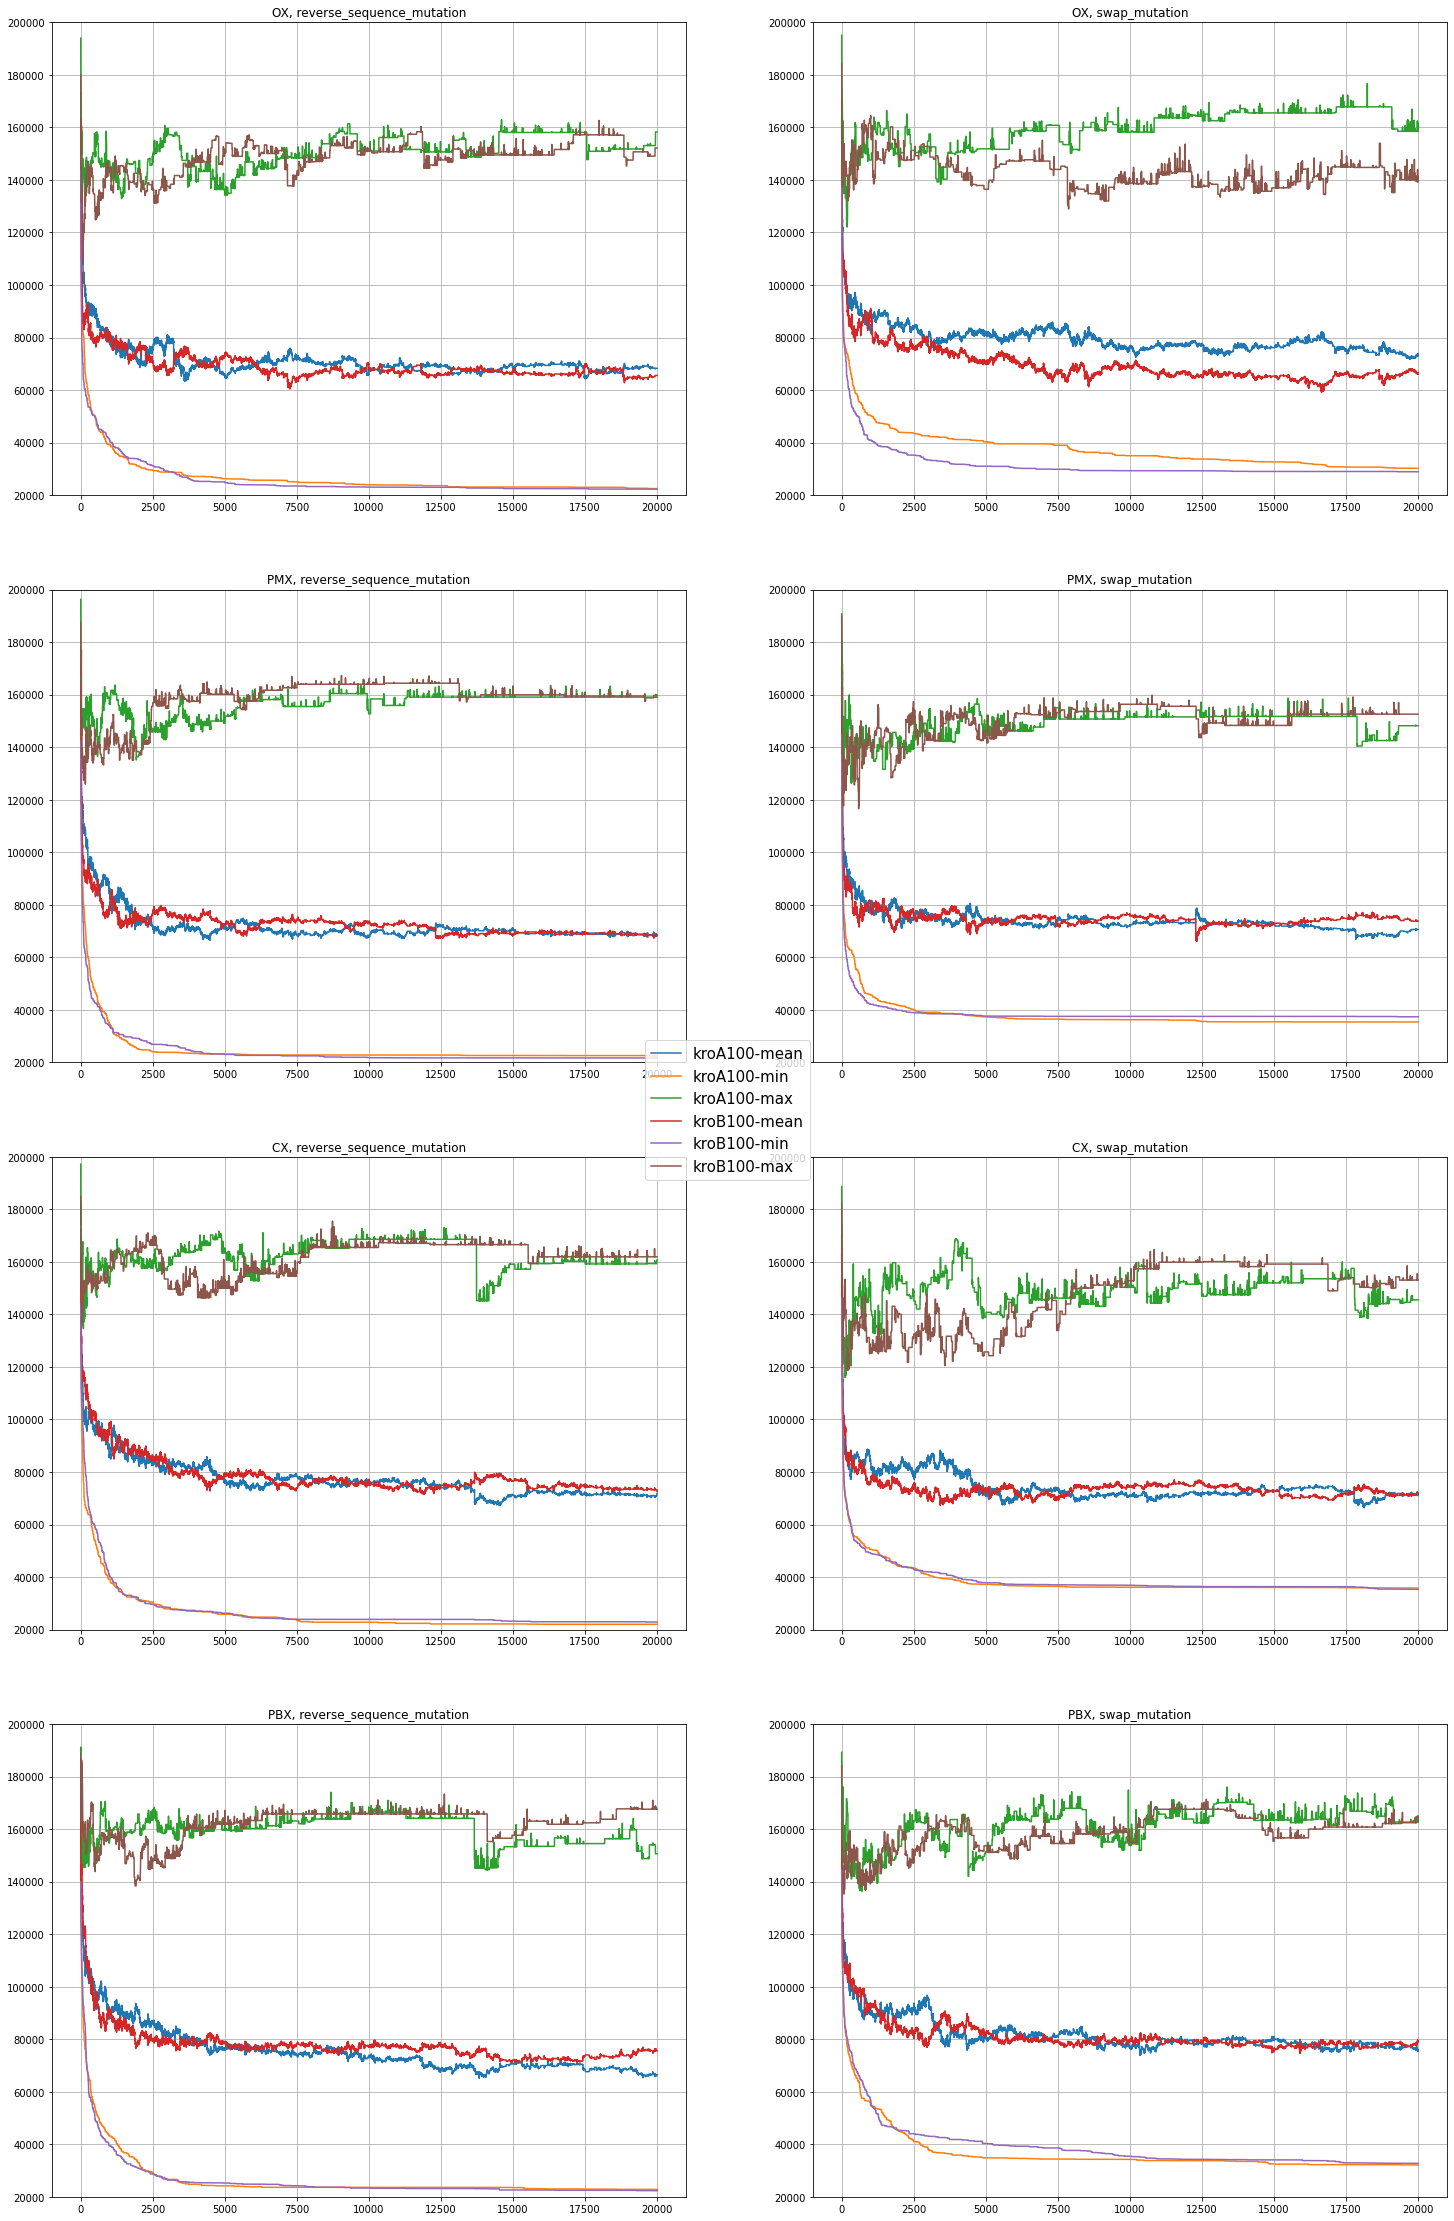

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(25,40))

for i, (k, v) in enumerate(results.items()):
    score = v[1]
    axs[int(i/2),i%2].set_title(f"{k[0]}, {k[1]}")
    subplot_min_max_mean(score, axs[int(i/2), i%2], ["kroA100", "kroB100"])


handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', prop={'size': 15})


plt.show()

In [18]:
A = []
B = []
mutation = []
crossover = []

for k, v in results.items():
    mutation.append(k[1])
    crossover.append(k[0])
    scores = v[1]
    min_scores = np.min(scores[-1], axis=0)
    A.append(min_scores[0])
    B.append(min_scores[1])

d = {"crossover": crossover, "mutation": mutation, "kroC100": A, "kroD100": B}

mins_df = pd.DataFrame(data=d)

# mins_df.sort_values(by=['kroA100', 'kroB100'])
mins_df

,crossover,mutation,kroC100,kroD100
0,OX,reverse_sequence_mutation,22466.706546,22268.979438
1,OX,swap_mutation,30177.998442,28891.367171
2,PMX,reverse_sequence_mutation,22376.535808,21664.377693
3,PMX,swap_mutation,35377.818867,37344.438211
4,CX,reverse_sequence_mutation,22017.983616,22877.803483
5,CX,swap_mutation,35818.772868,35331.781463
6,PBX,reverse_sequence_mutation,22832.093326,22322.951965
7,PBX,swap_mutation,32084.535690,32744.917250


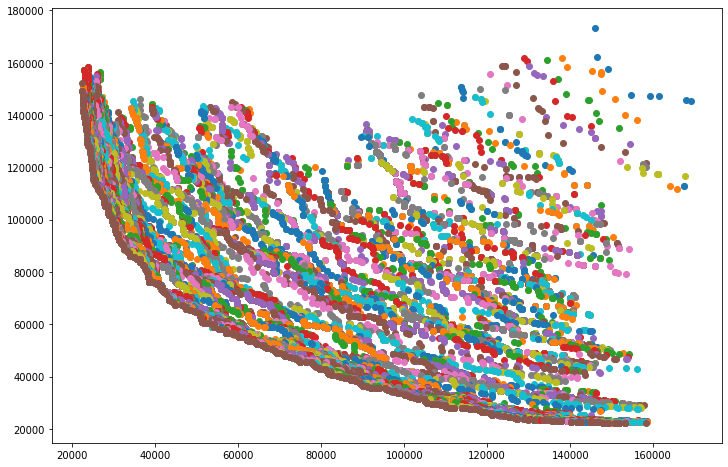

In [14]:
OX_RSM = results[(OX.__name__, reverse_sequence_mutation.__name__)][1]
to_plot = np.concatenate((OX_RSM[:100], OX_RSM[100:500][::10], OX_RSM[500:1000][::20], OX_RSM[1000:][::100]))
scatter_pareto_opt_fronts(to_plot)

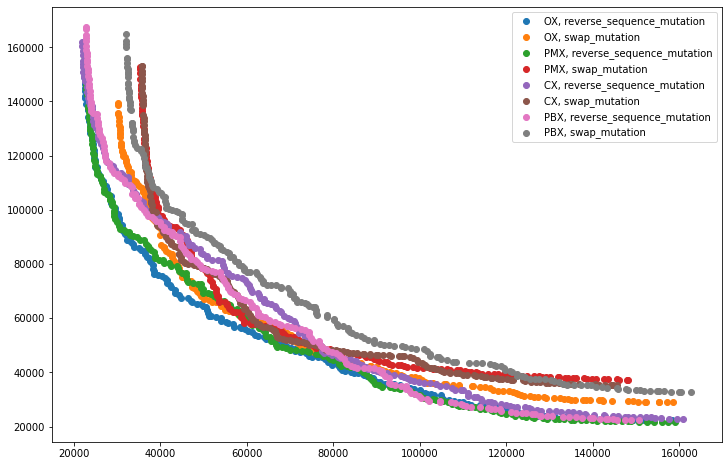

In [15]:
plt.figure(figsize=(12, 8))

# plt.grid()
for k, (_, scores) in results.items():
    fronts, _ = non_dominated_sort(scores[-1])
    best_solutions = scores[-1][fronts[0]]
    plt.scatter(best_solutions[:, 0], best_solutions[:, 1], label=f"{k[0]}, {k[1]}")

# plt.title("Najlepsze rozwiązania")
plt.legend()
plt.show()

[22329.92157953 22764.56490979]


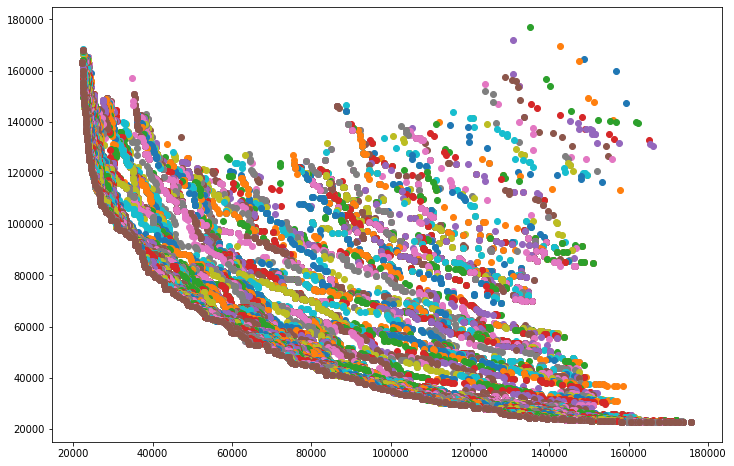

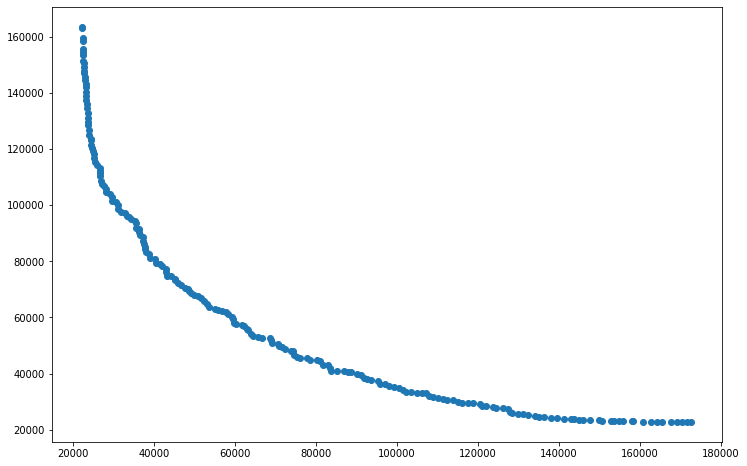

In [ ]:
print(np.min(OX_long_score[-1], axis=0))
# OX_RSM = results[(OX.__name__, reverse_sequence_mutation.__name__)][1]
to_plot = np.concatenate((OX_long_score[:100], OX_long_score[100:500][::10], OX_long_score[500:1000][::20], OX_long_score[1000:][::100]))
scatter_pareto_opt_fronts(to_plot)
scatter_pareto_opt_fronts(OX_long_score[-1:])

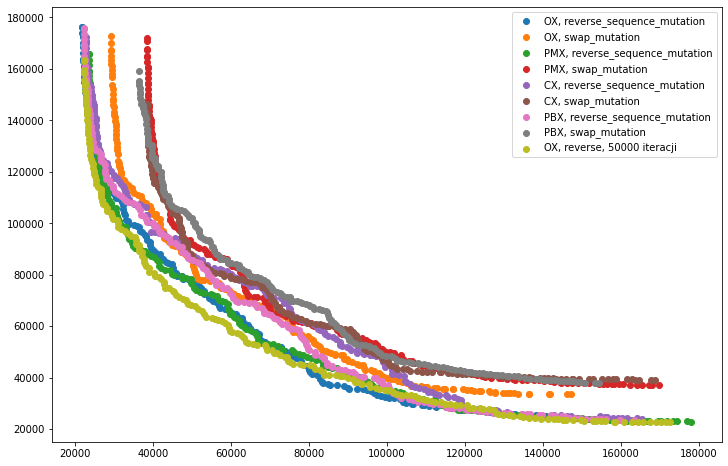

In [ ]:
plt.figure(figsize=(12, 8))

# plt.grid()
for k, (_, scores) in results.items():
    fronts, _ = non_dominated_sort(scores[-1])
    best_solutions = scores[-1][fronts[0]]
    plt.scatter(best_solutions[:, 0], best_solutions[:, 1], label=f"{k[0]}, {k[1]}")

fronts, _ = non_dominated_sort(OX_long_score[-1])
best_solutions = OX_long_score[-1][fronts[0]]
plt.scatter(best_solutions[:, 0], best_solutions[:, 1], label=f"OX, reverse, 50000 iteracji")

# plt.title("Najlepsze rozwiązania")
plt.legend()
plt.show()